<a href="https://colab.research.google.com/github/1337Rinz/ipynb/blob/main/Human_Activity_Recognition_convLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step1: download and visualize data::Labels (Data Exploration)




step2: preprocess dataset

step3: split data Train;Test set

step4: implement the ConvLSTM 

  * 4.1: construct Model

  * 4.2: compile & train model

  * 4.3: plot Model loss & accuracy 
  
DEMO


<!-- step5: implement the CNN-BiLSTM 

  * 5.1: construct Model
  
  * 5.2: compile & train model

  * 5.3: plot Model loss & accuracy curves -->



#import Library

In [1]:
# Install the required libraries.
!pip install youtube-dl moviepy
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/TahaAnwar/pafy.git to /tmp/pip-install-q9_sg3sc/pafy_93797d75ceec49b0817eaf95cd1b0c8a
  Running command git clone --filter=blob:none --quiet https://github.com/TahaAnwar/pafy.git /tmp/pip-install-q9_sg3sc/pafy_93797d75ceec49b0817eaf95cd1b0c8a
  Resolved https://github.com/TahaAnwar/pafy.git to commit 2f3c473b3df7961721d07e1504675313afd1d2cb
  Preparing metadata (setup.py) ... done
  Created wheel for pafy: filename=pafy-0.5.5-py2.py3-none-any.whl size=35692 sha256=42f6017485355112d6597e72ee00dab3be68705370a9aed8af51c525634d4c20
  Stored in directory: /tmp/pip-ephem-wheel-cache-rl2sz77_/wheels/38/75/72/035d5f91837fe6fdd9ee6ec71eadaf7829068a58f4789a63cc
Successfully built pafy


In [2]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
print("Import done")

Import done


In [3]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [4]:
# setting the seed for the random number generators

seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [5]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import datetime as dt

# TF
import tensorflow as tf
from tensorflow import keras
import keras
from collections import deque
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

  plt.style.use("seaborn")



In [6]:
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

In [7]:
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

#step1: download and visualize data::Labels (Data Exploration)

source: https://www.crcv.ucf.edu/data/UCF50.php

In [ ]:
# # Downlaod the UCF50 Dataset
# !wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar

# #Extract the Dataset
# !unrar x UCF50.rar

##visualization
The Dataset info:
*   **`50`** Action Categories

*   **`25`** Groups of Videos per Action Category

*   **`133`** Average Videos per Action Category

*   **`199`** Average Number of Frames per Video

*   **`320`** Average Frames Width per Video

*   **`240`** Average Frames Height per Video

*   **`26`** Average Frames Per Seconds per Video


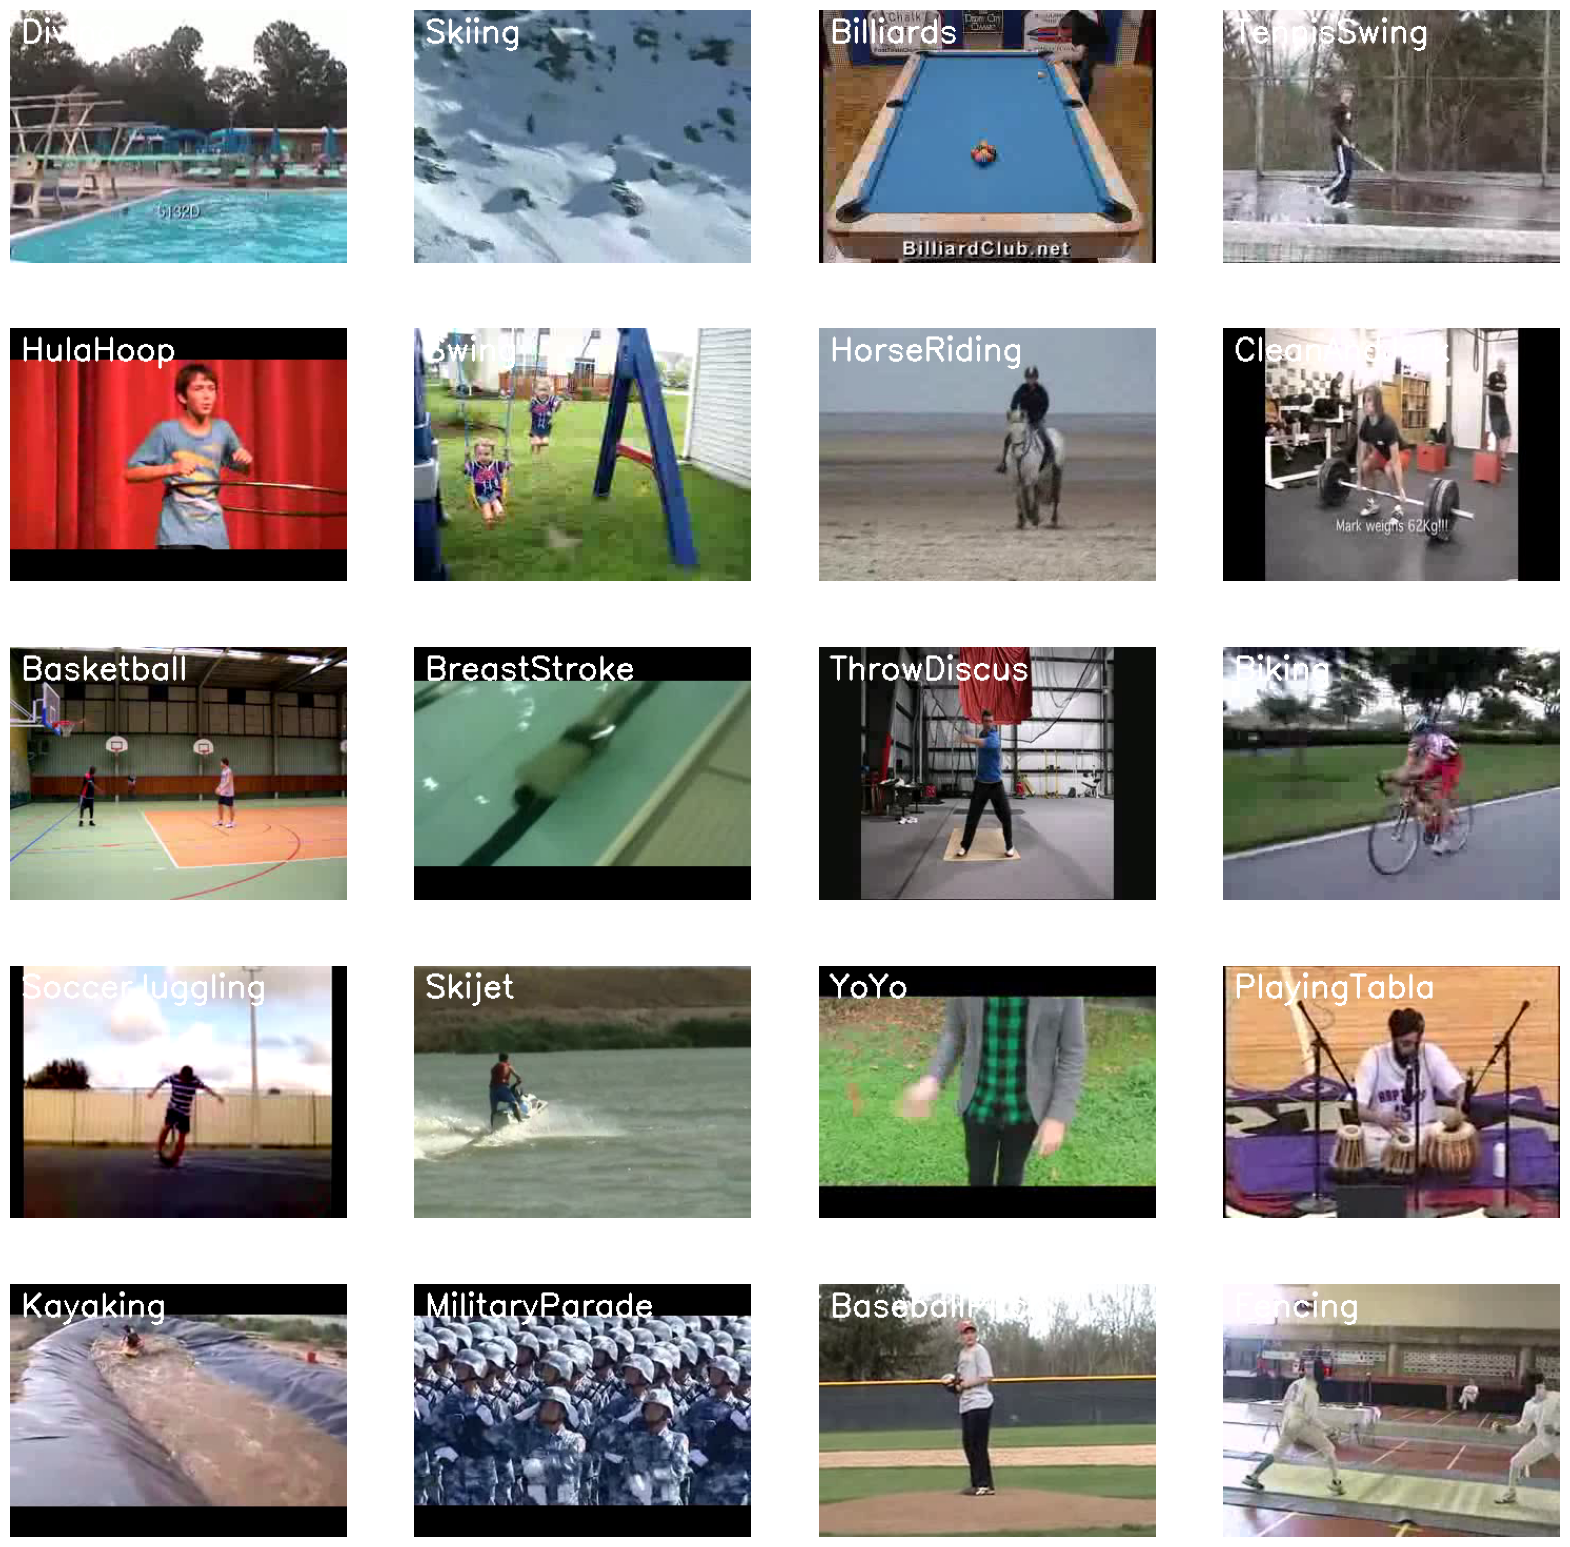

In [ ]:
# # visualize 20 random videos of the dataset

# # Create a Matplotlib figure and specify the size of the figure.
# plt.figure(figsize = (20, 20))

# # Get the names of all classes/categories in UCF50.
# all_classes_names = os.listdir('UCF50')

# # Generate a list of 20 random values. The values will be between 0-50, 
# # where 50 is the total number of class in the dataset. 
# random_range = random.sample(range(len(all_classes_names)), 20)

# # Iterating through all the generated random values.
# for counter, random_index in enumerate(random_range, 1):

#     # Retrieve a Class Name using the Random Index.
#     selected_class_Name = all_classes_names[random_index]

#     # Retrieve the list of all the video files present in the randomly selected Class Directory.
#     video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

#     # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
#     selected_video_file_name = random.choice(video_files_names_list)

#     # Initialize a VideoCapture object to read from the video File.
#     video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    
#     # Read the first frame of the video file.
#     _, bgr_frame = video_reader.read()

#     # Release the VideoCapture object. 
#     video_reader.release()

#     # Convert the frame from BGR into RGB format. 
#     rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

#     # Write the class name on the video frame.
#     cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
#     # Display the frame.
#     plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

#step1 ver 2


In [8]:
from IPython.display import HTML
from base64 import b64encode

# To Show a Video in Notebook
def Play_Video(filepath):
    html = ''
    video = open(filepath,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

In [9]:
# Classes Directories
NonViolnceVideos_Dir = "/content/drive/MyDrive/Cuộc thi AI/data/NonViolence"
ViolnceVideos_Dir = "/content/drive/MyDrive/Cuộc thi AI/data/Violence"

# Retrieve the list of all the video files present in the Class Directory.
NonViolence_files_names_list = os.listdir(NonViolnceVideos_Dir)
Violence_files_names_list = os.listdir(ViolnceVideos_Dir)

# Randomly select a video file from the Classes Directory.
Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

In [10]:
# Play Random Non Violence Video
Play_Video(f"{NonViolnceVideos_Dir}/{Random_NonViolence_Video}")

In [11]:
# Play Random Violence Video
Play_Video(f"{ViolnceVideos_Dir}/{Random_Violence_Video}")

#step2: preprocess dataset
resize the frames width and height, to reduce the computation and normalized data to range [0-1] (pixel values/ 255)

In [ ]:
# # Specify the height and width to which each video frame will be resized in dataset.
# IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# # Specify the number of frames of a video that will be fed to the model as one sequence.
# SEQUENCE_LENGTH = 32

# # Specify the directory containing the UCF50 dataset. 
# DATASET_DIR = "UCF50"

# # Specify the list containing the names of the classes used for training.
# CLASSES_LIST = ["WalkingWithDog", "TaiChi", "PlayingGuitar", "HorseRace"]

In [12]:
#ver 2.0
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 224, 224
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 15
 

DATASET_DIR = "/content/drive/MyDrive/Cuộc thi AI/data"
 
CLASSES_LIST = ["NonViolence","Violence"]

**Note:**  **`IMAGE_HEIGHT`**, **`IMAGE_WIDTH`** **`SEQUENCE_LENGTH`**  can be increased for better results.


##Create a Function to Extract, Resize & Normalize Frames
function **`frames_extraction()`**  will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames. 


In [13]:
# function frames_extraction()
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

## Create a Function for Dataset Creation

function **`create_dataset()`** that will iterate through all the classes specified in the **`CLASSES_LIST`** constant and will call the function  **`frame_extraction()`** on every video file of the selected classes and return the frames (**`features`**), class index ( **`labels`**), and video file path (**`video_files_paths`**).


In [14]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [15]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: NonViolence
Extracting Data of Class: Violence


In [16]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

#Step 3: Split the Data into Train and Test Set


 split data to create training and testing sets. Also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [17]:
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2,
                                                                            shuffle = True, random_state = 42)

In [ ]:
# # Then split the train set into training set (80%) and validation set (20%)
# features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, 
#                                                                           test_size=0.20, shuffle=True, 
#                                                                           random_state=seed_constant)

This will split your original dataset into 60% training set, 20% validation set, and 20% test set.

You can then use the training set (features_train and labels_train) for training your model, the validation set (features_val and labels_val) for tuning hyperparameters and the test set (features_test and labels_test) for evaluating the final model.






#step4: implement the ConvLSTM

**ConvLSTM2D** 

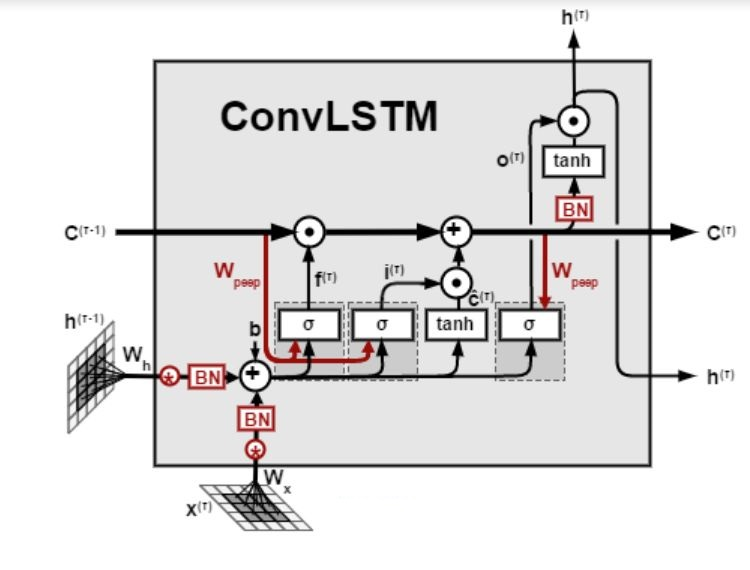

##4.1 construct Model

In [18]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''

    # We will use a Sequential model for model construction
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model

construct the  `convlstm` model.

In [19]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 15, 222, 222, 4)   1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 111, 111, 4)  0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 15, 111, 111, 4)  0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 15, 109, 109, 8)   3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 15, 55, 55, 8)    0         
 3D)                                                             
                                                        

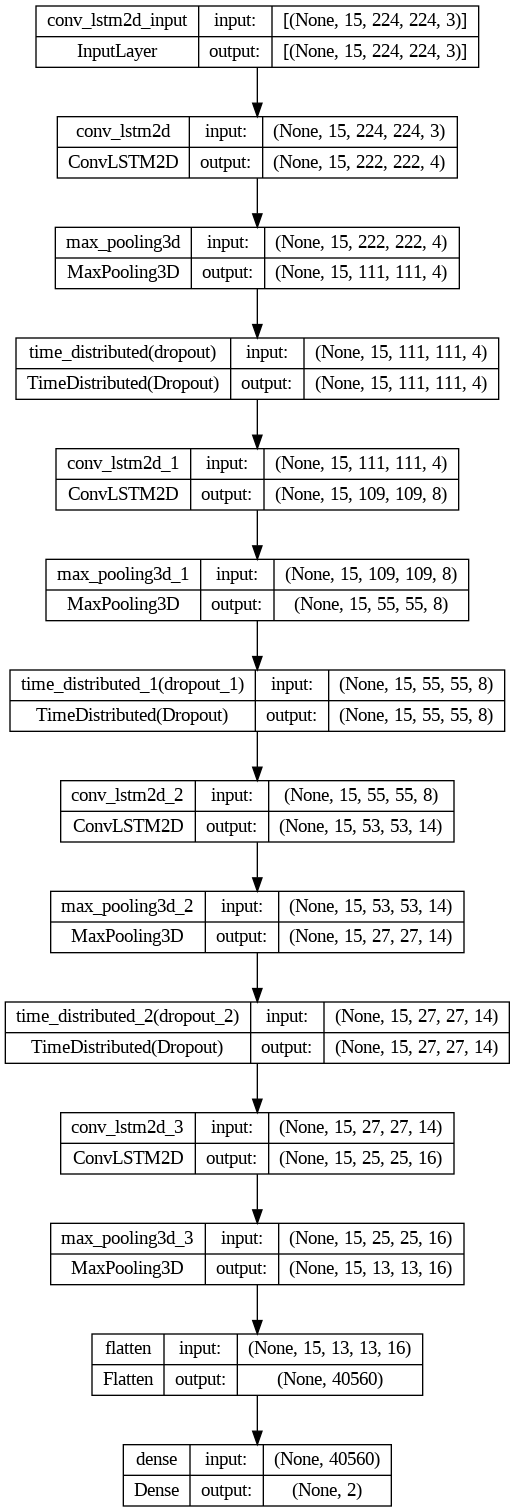

In [20]:
# Plot the structure of the model. (convlstm_model)
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

#4.2 ver 2.0


In [21]:
patience = 5

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.0005

batch_size = 8
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

##4.2: compile & train model

In [24]:
### ver1.2
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Create checkpoint for model
# Change name for model

checkpoint_filepath = 'ModelWeights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)


# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                                  factor=0.8,
                                                  patience=3,
                                                  #min_lr=0.0001,
                                                  verbose=1)
callbacks = [lr_callback, early_stopping_callback, reduce_lr]


In [25]:
# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [early_stopping_callback])

Epoch 1/50
24/24 [==============================] - 40s 677ms/step - loss: 0.7310 - accuracy: 0.4255 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 2/50
24/24 [==============================] - 13s 544ms/step - loss: 0.6284 - accuracy: 0.6170 - val_loss: 0.7814 - val_accuracy: 0.6667
Epoch 3/50
24/24 [==============================] - 14s 554ms/step - loss: 0.6129 - accuracy: 0.6915 - val_loss: 0.5372 - val_accuracy: 0.9167
Epoch 4/50
24/24 [==============================] - 14s 596ms/step - loss: 0.6291 - accuracy: 0.6596 - val_loss: 0.4687 - val_accuracy: 0.7917
Epoch 5/50
24/24 [==============================] - 13s 558ms/step - loss: 0.4204 - accuracy: 0.8085 - val_loss: 0.2840 - val_accuracy: 0.9583
Epoch 6/50
24/24 [==============================] - 14s 609ms/step - loss: 0.2443 - accuracy: 0.8936 - val_loss: 0.1527 - val_accuracy: 0.9583
Epoch 7/50
24/24 [==============================] - 14s 605ms/step - loss: 0.4302 - accuracy: 0.8723 - val_loss: 0.8023 - val_accuracy: 0.6250

Evaluate the model

In [26]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

1/1 [==============================] - 2s 2s/step - loss: 1.4636 - accuracy: 0.8667


SAVE model

In [27]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
convlstm_model.save(model_file_name)

##4.3: plot Model loss & accuracy curves

In [28]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

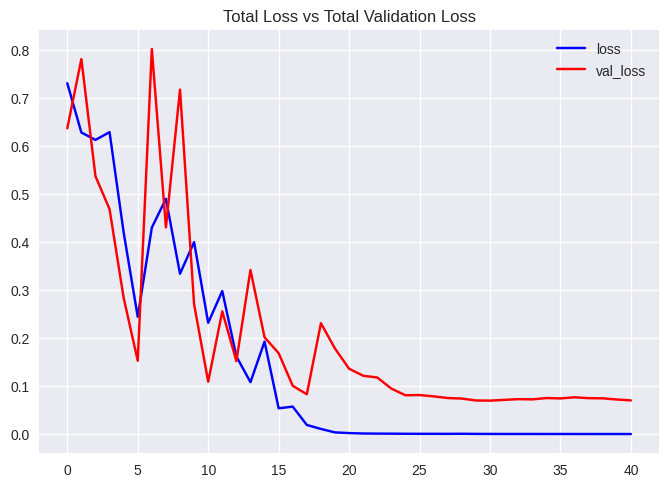

In [29]:
# Visualize the training and validation loss metrices.
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

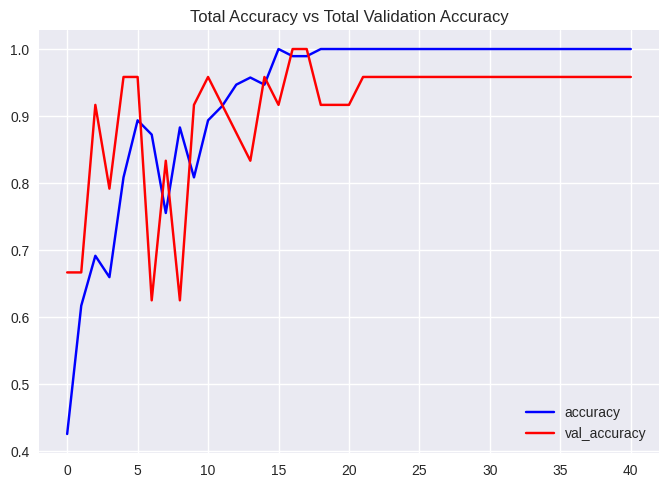

In [30]:
# Visualize the training and validation accuracy metrices.
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

#model Conv-BiLSTM 



##5.1 construct Model

In [ ]:
def create_conv_bilstm_model():
    '''
    This function will construct the required Convolutional Bi-LSTM model.
    Returns:
        model: It is the required constructed Convolutional Bi-LSTM model.
    '''

    # We will use a Sequential model for model construction
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))


    model.add(TimeDistributed(Flatten()))

    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))

    model.add(Dense(len(CLASSES_LIST), activation='softmax'))
    ########################################################################################################################

    # Display the models summary.
    model.summary()

    # Return the constructed Convolutional Bi-LSTM model.
    return model


construct the  `conv_bilstm` model.

In [ ]:
# Construct the required bilstm model.
conv_bilstm_model = create_conv_bilstm_model()

# Display the success message. 
print("Model Created Successfully!")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_19 (TimeDi  (None, 32, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_20 (TimeDi  (None, 32, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 32, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 32, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 32, 4, 4, 32)    

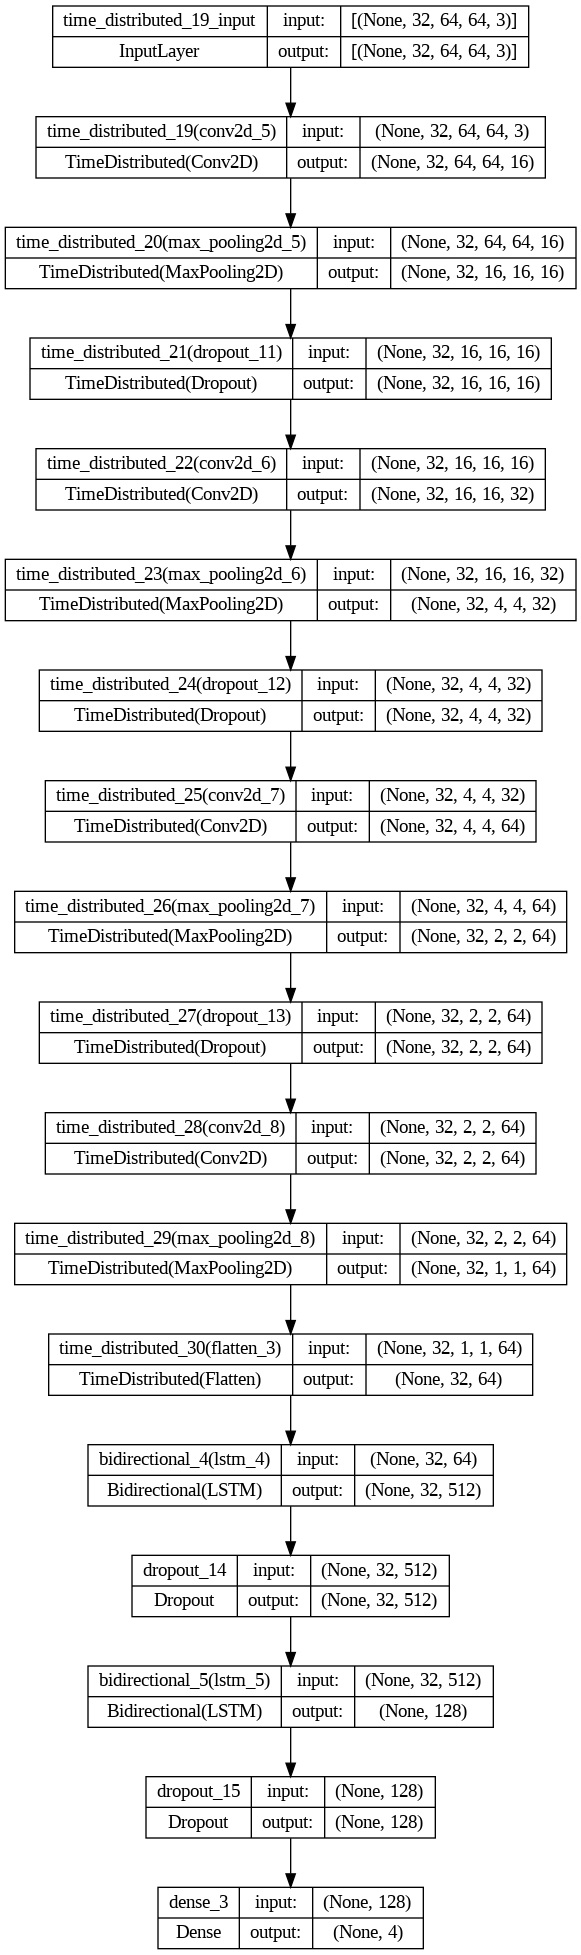

In [ ]:
# Plot the structure of the model. (convlstm_model)
plot_model(conv_bilstm_model, to_file = 'conv_bilstm_model_structure.png', show_shapes = True, show_layer_names = True)

##5.2: compile & train model

In [ ]:
#conv_bilstm_model

# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
conv_bilstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
conv_bilstm_model_training_history = conv_bilstm_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
61/61 [==============================] - 14s 66ms/step - loss: 1.3794 - accuracy: 0.3074 - val_loss: 1.4064 - val_accuracy: 0.3115
Epoch 2/70
61/61 [==============================] - 1s 20ms/step - loss: 1.3421 - accuracy: 0.3525 - val_loss: 1.2137 - val_accuracy: 0.4426
Epoch 3/70
61/61 [==============================] - 1s 20ms/step - loss: 1.0958 - accuracy: 0.4590 - val_loss: 0.9213 - val_accuracy: 0.5902
Epoch 4/70
61/61 [==============================] - 1s 20ms/step - loss: 0.9144 - accuracy: 0.5082 - val_loss: 0.9930 - val_accuracy: 0.4918
Epoch 5/70
61/61 [==============================] - 1s 20ms/step - loss: 0.8004 - accuracy: 0.5656 - val_loss: 0.8005 - val_accuracy: 0.5738
Epoch 6/70
61/61 [==============================] - 1s 20ms/step - loss: 0.7704 - accuracy: 0.6311 - val_loss: 0.6258 - val_accuracy: 0.7377
Epoch 7/70
61/61 [==============================] - 1s 21ms/step - loss: 0.6504 - accuracy: 0.6967 - val_loss: 0.6275 - val_accuracy: 0.7049
Epoch 8/70
6

In [ ]:
# Evaluate the trained model. (conv_bilstm_model)
model_evaluation_history = conv_bilstm_model.evaluate(features_test, labels_test)

4/4 [==============================] - 1s 35ms/step - loss: 0.5714 - accuracy: 0.8672


###SAVE model

In [ ]:
#save conv_bilstm_model
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'conv_bilstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save your Model.
conv_bilstm_model.save(model_file_name)

##5.3: plot Model loss & accuracy curves

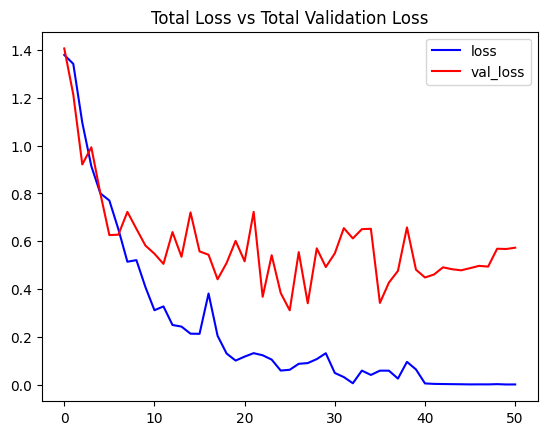

In [ ]:
#conv_bilstm_model
# Visualize the training and validation loss metrices.
plot_metric(conv_bilstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

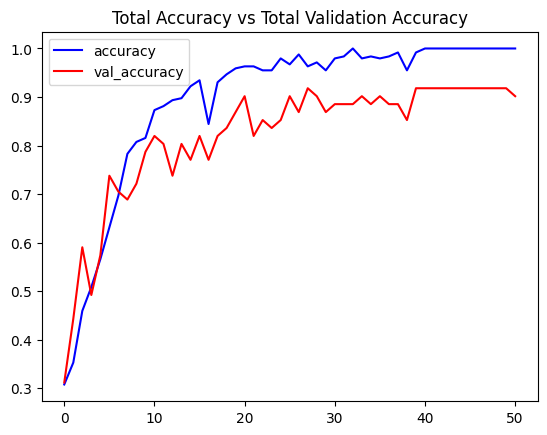

In [ ]:
# Visualize the training and validation accuracy metrices.
plot_metric(conv_bilstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

#performance 

In [31]:
labels_predict = convlstm_model.predict(features_test)

1/1 [==============================] - 2s 2s/step


In [32]:
# Decoding the data to use in Metrics
labels_predict = np.argmax(labels_predict , axis=1)
labels_test_normal = np.argmax(labels_test , axis=1)

In [33]:
labels_test_normal.shape , labels_predict.shape

((30,), (30,))

In [34]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict, labels_test_normal)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.8666666666666667


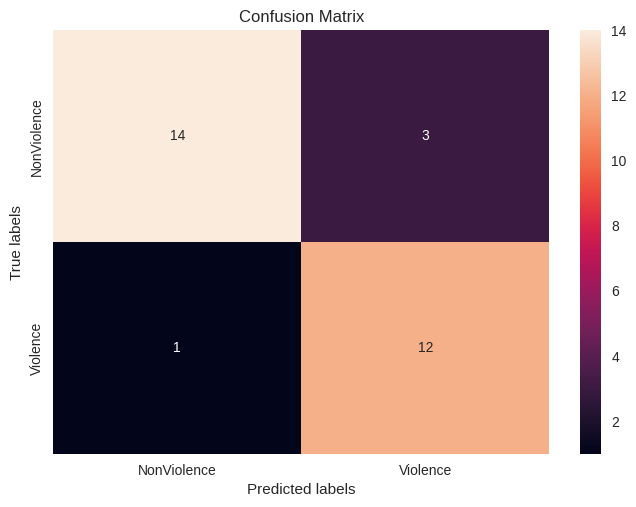

In [35]:
# Confusion Matrix

import seaborn as sns 
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm=confusion_matrix(labels_test_normal, labels_predict)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NonViolence', 'Violence']); ax.yaxis.set_ticklabels(['NonViolence', 'Violence']);

In [36]:
# Classification Report
from sklearn.metrics import classification_report

ClassificationReport = classification_report(labels_test_normal,labels_predict)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.80      0.92      0.86        13

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



#predict by frame


In [41]:
def predict_frames(video_file_path, output_file_path, SEQUENCE_LENGTH):
    
    # Read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # VideoWriter to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 
                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
 
    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
 
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():
 
        ok, frame = video_reader.read() 
        
        if not ok:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame 
        normalized_frame = resized_frame / 255
 
        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)
 
        # We Need at Least number of SEQUENCE_LENGTH Frames to perform a prediction.
        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:                        
 
            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
 
            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)
 
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
 
        # Write predicted class name on top of the frame.
        if predicted_class_name == "Violence":
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 12)
        else:
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 12)
         
        # Write The frame into the disk using the VideoWriter
        video_writer.write(frame)                       
        
    video_reader.release()
    video_writer.release()

In [42]:
plt.style.use("default")

# To show Random Frames from the saved output predicted video (output predicted video doesn't show on the notebook but can be downloaded)
def show_pred_frames(pred_video_path): 

    plt.figure(figsize=(20,15))

    video_reader = cv2.VideoCapture(pred_video_path)

    # Get the number of frames in the video.
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Get Random Frames from the video then Sort it
    random_range = sorted(random.sample(range (SEQUENCE_LENGTH , frames_count ), 12))
        
    for counter, random_index in enumerate(random_range, 1):
        
        plt.subplot(5, 4, counter)

        # Set the current frame position of the video.  
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_index)
          
        ok, frame = video_reader.read() 

        if not ok:
          break 

        frame = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)

        plt.imshow(frame);ax.figure.set_size_inches(20,20);plt.tight_layout()
                            
    video_reader.release()

In [43]:
# Construct the output video path.
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
 
output_video_file_path = f'{test_videos_directory}/Output-Test-Video.mp4'

1/1 [==============================] - 0s 53ms/step


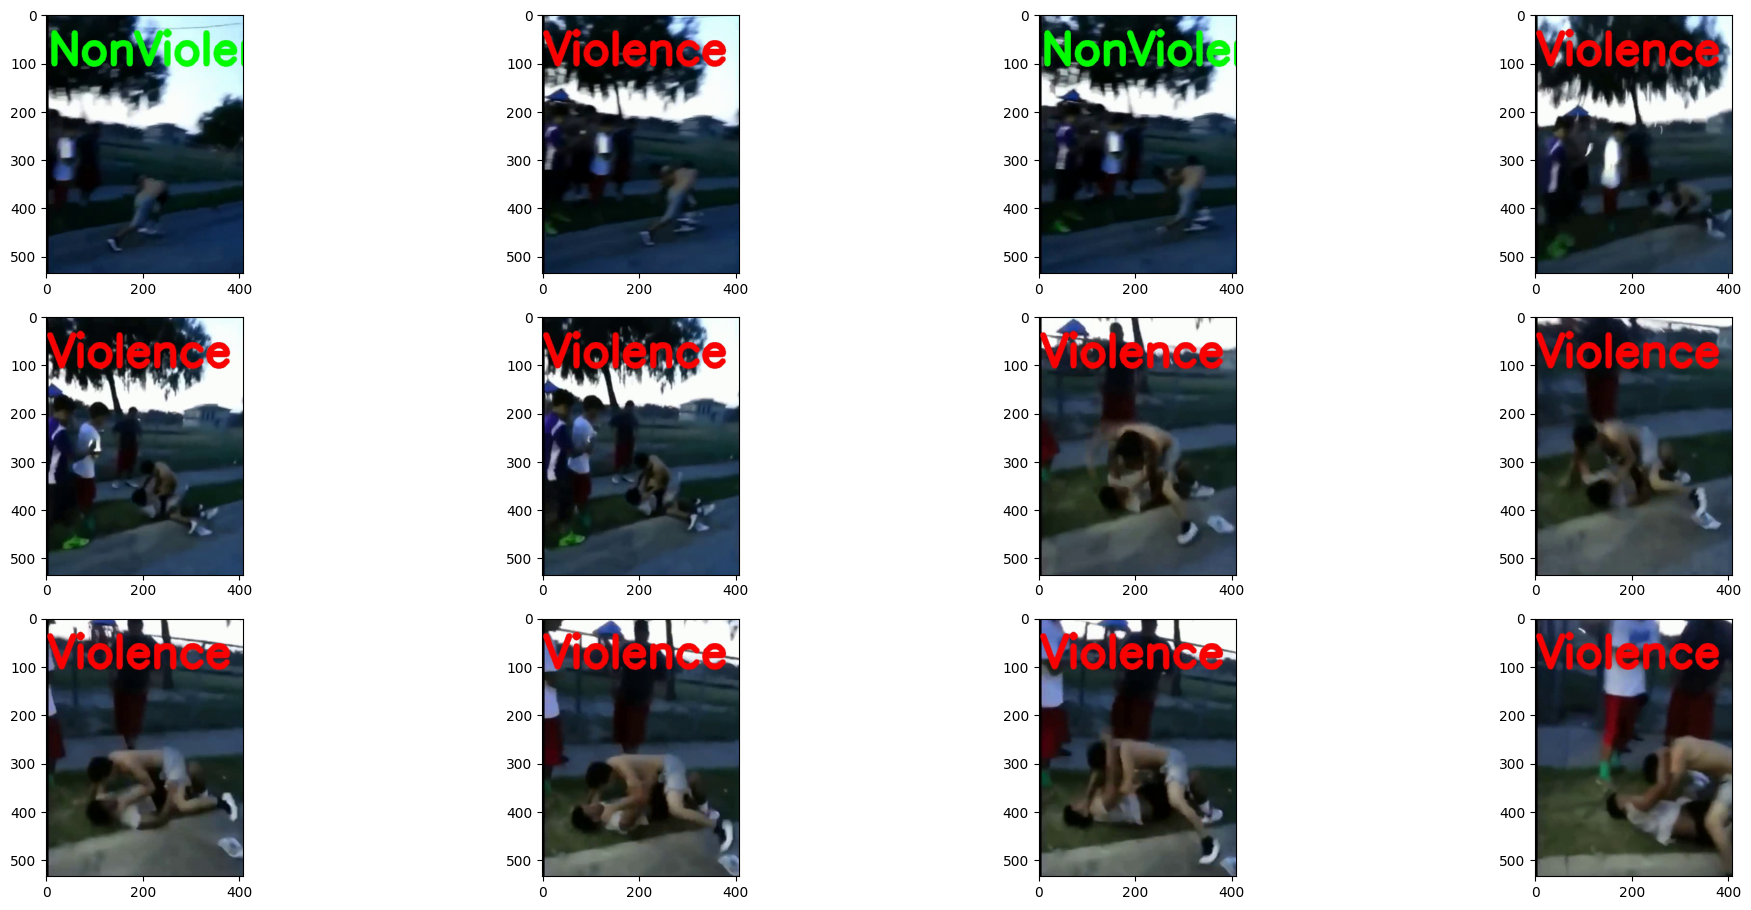

In [44]:
# Specifying video to be predicted
input_video_file_path = "/content/drive/MyDrive/Cuộc thi AI/data/TEST/V_208.mp4"

# Perform Prediction on the Test Video.
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

# Show random frames from the output video
show_pred_frames(output_video_file_path)

In [45]:
# Play the actual video
Play_Video(input_video_file_path)

#Prediction For The Video

In [46]:
def predict_video(video_file_path, SEQUENCE_LENGTH):
 
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Declare a list to store video frames we will extract.
    frames_list = []
    
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
 
    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        success, frame = video_reader.read() 
 
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame.
        normalized_frame = resized_frame / 255
        
        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)
 
    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(frames_list, axis = 0))[0]
 
    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)
 
    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]
    
    # Display the predicted class along with the prediction confidence.
    print(f'Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    video_reader.release()

In [58]:
# Specifying video to be predicted
input_video_file_path = "/content/drive/MyDrive/Cuộc thi AI/data/TEST/V_205.mp4"

# Perform Single Prediction on the Test Video.
predict_video(input_video_file_path, SEQUENCE_LENGTH)

# Play the actual video
Play_Video(input_video_file_path)

1/1 [==============================] - 0s 61ms/step
Predicted: Violence
Confidence: 0.996117353439331


In [60]:
# Specifying video to be predicted
input_video_file_path = "/content/drive/MyDrive/Cuộc thi AI/data/TEST/NV_38.mp4"

# Perform Single Prediction on the Test Video.
predict_video(input_video_file_path, SEQUENCE_LENGTH)

# Play the actual video
Play_Video(input_video_file_path)

1/1 [==============================] - 0s 74ms/step
Predicted: NonViolence
Confidence: 1.0
